In [ ]:
# Nama : Maulana Ikhsan
# NPM : 2017051090
# Kelas : PIL

#UTS PENGENALAN POLA

# Preprocessing Data Tabular

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import glob
import os
import skimage
import nltk
import re
from skimage import io, filters 
from skimage.color import rgb2hsv, rgb2gray
from skimage import img_as_float
from skimage.morphology import reconstruction
from scipy.ndimage import gaussian_filter


In [140]:
df = pd.read_csv('petfinder-mini.csv')
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100.0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,I just found it alone yesterday near my apartm...,2.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0.0,Their pregnant mother was dumped by her irresp...,7.0,3.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150.0,"Good guard dog, very alert, active, obedience ...",8.0,2.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0.0,This handsome yet cute boy is up for adoption....,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0.0,been at my place for a while..am hoping to fin...,0.0,4.0
15462,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0.0,1 month old white + grey kitten for adoption n...,1.0,3.0
15463,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0.0,ooooo,1.0,0.0
15464,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0.0,she is very shy..adventures and independent..s...,3.0,4.0


In [125]:
#cek ukuran data
df.shape

(15466, 15)

In [126]:
#cek tipe data
df.dtypes

Type              object
Age               object
Breed1            object
Gender            object
Color1            object
Color2            object
MaturitySize      object
FurLength         object
Vaccinated        object
Sterilized        object
Health            object
Fee              float64
Description       object
PhotoAmt         float64
AdoptionSpeed    float64
dtype: object

In [127]:
#mengecek nilai yang hilang
df.isnull().sum()

Type              0
Age               0
Breed1            0
Gender            0
Color1            0
Color2            1
MaturitySize      1
FurLength         1
Vaccinated        1
Sterilized        1
Health            1
Fee               1
Description      13
PhotoAmt          1
AdoptionSpeed     1
dtype: int64

In [141]:
#handle dengan menghapus satu instance penuh
df = df.dropna()

# Mengganti nilai yang hilang 

In [129]:
mean = df['PhotoAmt'].mean()
print (mean)

3.6088785349123147


In [130]:
mean = df['PhotoAmt'].mean()
df['PhotoAmt'].fillna(mean)

0        1.0
1        2.0
2        7.0
3        8.0
4        3.0
        ... 
15461    0.0
15462    1.0
15463    1.0
15464    3.0
15465    1.0
Name: PhotoAmt, Length: 15453, dtype: float64

In [132]:
df.isnull().sum()

Type             0
Age              0
Breed1           0
Gender           0
Color1           0
Color2           0
MaturitySize     0
FurLength        0
Vaccinated       0
Sterilized       0
Health           0
Fee              0
Description      0
PhotoAmt         0
AdoptionSpeed    0
dtype: int64

In [142]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100.0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,I just found it alone yesterday near my apartm...,2.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0.0,Their pregnant mother was dumped by her irresp...,7.0,3.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150.0,"Good guard dog, very alert, active, obedience ...",8.0,2.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0.0,This handsome yet cute boy is up for adoption....,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0.0,been at my place for a while..am hoping to fin...,0.0,4.0
15462,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0.0,1 month old white + grey kitten for adoption n...,1.0,3.0
15463,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0.0,ooooo,1.0,0.0
15464,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0.0,she is very shy..adventures and independent..s...,3.0,4.0


# handle missing value dengan rataan dari data

In [152]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100.0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,I just found it alone yesterday near my apartm...,2.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0.0,Their pregnant mother was dumped by her irresp...,7.0,3.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150.0,"Good guard dog, very alert, active, obedience ...",8.0,2.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0.0,This handsome yet cute boy is up for adoption....,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0.0,been at my place for a while..am hoping to fin...,0.0,4.0
15462,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0.0,1 month old white + grey kitten for adoption n...,1.0,3.0
15463,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0.0,ooooo,1.0,0.0
15464,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0.0,she is very shy..adventures and independent..s...,3.0,4.0


In [156]:
#handle missing value dengan rataan dari data
import math
df['PhotoAmt'].fillna(math.floor(df['PhotoAmt'].mean()), inplace=True)
df['AdoptionSpeed'].fillna(math.floor(df['AdoptionSpeed'].mean()), inplace=True)
df['Fee'].fillna(math.floor(df['Fee'].mean()), inplace=True)

In [157]:
df.isnull().sum()

Type              0
Age               0
Breed1            0
Gender            0
Color1            0
Color2            1
MaturitySize      1
FurLength         1
Vaccinated        1
Sterilized        1
Health            1
Fee               0
Description      13
PhotoAmt          0
AdoptionSpeed     0
dtype: int64

# Imbalance data

In [159]:
df = pd.read_csv('petfinder-mini.csv')
df.head(10)

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100.0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,I just found it alone yesterday near my apartm...,2.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0.0,Their pregnant mother was dumped by her irresp...,7.0,3.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150.0,"Good guard dog, very alert, active, obedience ...",8.0,2.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0.0,This handsome yet cute boy is up for adoption....,3.0,2.0
5,Cat,3,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0.0,This is a stray kitten that came to my house. ...,2.0,2.0
6,Cat,12,Domestic Long Hair,Male,Black,No Color,Medium,Long,No,Not Sure,Healthy,300.0,anyone within the area of ipoh or taiping who ...,3.0,1.0
7,Cat,2,Domestic Medium Hair,Female,Gray,No Color,Medium,Medium,No,No,Healthy,0.0,"healthy and active, feisty kitten found in nei...",6.0,1.0
8,Cat,12,Domestic Medium Hair,Female,Black,White,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,"Very manja and gentle stray cat found, we woul...",2.0,4.0
9,Dog,2,Mixed Breed,Male,Black,Brown,Medium,Short,No,No,Healthy,0.0,"For serious adopter, please do sms or call for...",7.0,1.0


In [160]:
#cleaning
#missing data
nan_data = df[df.isna().any(axis=1)]
nan_data

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
71,Cat,19,Persian,Female,Black,Gray,Large,Long,Yes,No,Healthy,0.0,NaN,3.0,1.0
461,Cat,2,Domestic Long Hair,Male,Black,White,Medium,Medium,No,No,Healthy,0.0,NaN,3.0,4.0
825,Cat,6,Domestic Short Hair,Male,Black,Gray,Small,Short,Yes,Not Sure,Healthy,0.0,NaN,1.0,4.0
2859,Dog,0,Mixed Breed,Male,Cream,White,Medium,Medium,Not Sure,Not Sure,Minor Injury,0.0,NaN,0.0,4.0
3713,Cat,25,Siamese,Male,Brown,No Color,Large,Short,Yes,Yes,Healthy,0.0,NaN,1.0,2.0
4763,Dog,7,Golden Retriever,Male,Golden,No Color,Large,Medium,Yes,Yes,Healthy,250.0,NaN,4.0,1.0
5759,Cat,84,Domestic Short Hair,Male,Golden,No Color,Large,Short,Yes,Yes,Healthy,0.0,NaN,5.0,2.0
6289,Cat,2,Tabby,Male,Black,White,Medium,Short,No,No,Healthy,0.0,NaN,2.0,2.0
9046,s in about 2 weeks time. He is healthy,very active and playful. He likes chasing aro...,"please call .""",5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10602,Cat,2,Tabby,Female,Black,White,Medium,Short,No,No,Healthy,0.0,NaN,1.0,2.0


In [161]:
len(df)

15466

In [162]:
df = df.dropna()
len(df)

15453

In [163]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,Cat,3,Tabby,Male,Black,White,Small,Short,No,No,Healthy,100.0,Nibble is a 3+ month old ball of cuteness. He ...,1.0,2.0
1,Cat,1,Domestic Medium Hair,Male,Black,Brown,Medium,Medium,Not Sure,Not Sure,Healthy,0.0,I just found it alone yesterday near my apartm...,2.0,0.0
2,Dog,1,Mixed Breed,Male,Brown,White,Medium,Medium,Yes,No,Healthy,0.0,Their pregnant mother was dumped by her irresp...,7.0,3.0
3,Dog,4,Mixed Breed,Female,Black,Brown,Medium,Short,Yes,No,Healthy,150.0,"Good guard dog, very alert, active, obedience ...",8.0,2.0
4,Dog,1,Mixed Breed,Male,Black,No Color,Medium,Short,No,No,Healthy,0.0,This handsome yet cute boy is up for adoption....,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,Dog,24,Poodle,Male,Brown,Golden,Medium,Medium,Not Sure,No,Healthy,0.0,been at my place for a while..am hoping to fin...,0.0,4.0
15462,Cat,1,Domestic Short Hair,Female,Cream,Gray,Medium,Short,No,No,Healthy,0.0,1 month old white + grey kitten for adoption n...,1.0,3.0
15463,Dog,6,Schnauzer,Female,Black,White,Small,Long,Yes,No,Healthy,0.0,ooooo,1.0,0.0
15464,Cat,9,Domestic Short Hair,Female,Yellow,White,Small,Short,Yes,Yes,Healthy,0.0,she is very shy..adventures and independent..s...,3.0,4.0


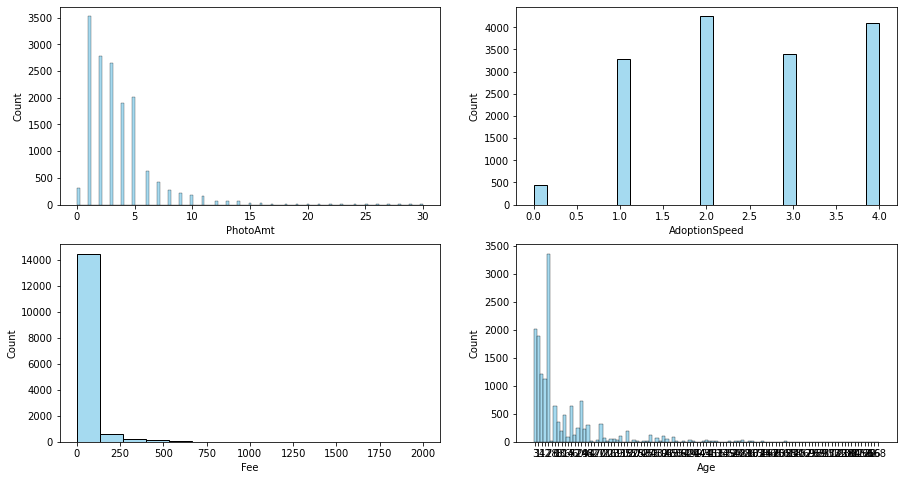

In [176]:
#visualisasi data

fig,axes = plt.subplots(2,2,figsize=(15,8))

sns.histplot(data=df,x='PhotoAmt',ax=axes[0,0],color='skyblue')
sns.histplot(data=df,x='AdoptionSpeed',ax=axes[0,1],color='skyblue')
sns.histplot(data=df,x='Fee',ax=axes[1,0],color='skyblue')
sns.histplot(data=df,x='Age',ax=axes[1,1],color='skyblue')
plt.show()

In [188]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [189]:
#transformasi
df['Type'] = encode.fit_transform(df['Type'].values)
df['Breed1'] = encode.fit_transform(df['Breed1'].values)
df['Gender'] = encode.fit_transform(df['Gender'].values)
df['Color1'] = encode.fit_transform(df['Color1'].values)
df['Color2'] = encode.fit_transform(df['Color2'].values)
df['MaturitySize'] = encode.fit_transform(df['MaturitySize'].values)
df['FurLength'] = encode.fit_transform(df['FurLength'].values)
df['Vaccinated'] = encode.fit_transform(df['Vaccinated'].values)
df['Sterilized'] = encode.fit_transform(df['Sterilized'].values)
df['Health'] = encode.fit_transform(df['Health'].values)
df['Description'] = encode.fit_transform(df['Description'].values)

In [190]:
df

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt,AdoptionSpeed
0,0,3,147,1,0,5,2,2,0,0,0,100.0,6119,1.0,2.0
1,0,1,54,1,0,0,1,1,1,1,0,0.0,4163,2.0,0.0
2,1,1,99,1,1,5,1,1,2,0,0,0.0,8234,7.0,3.0
3,1,4,99,0,0,0,1,2,2,0,0,150.0,2914,8.0,2.0
4,1,1,99,1,0,4,1,2,0,0,0,0.0,8468,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,1,24,115,1,1,2,1,1,1,0,0,0.0,9817,0.0,4.0
15462,0,1,55,0,2,3,1,2,0,0,0,0.0,188,1.0,3.0
15463,1,6,126,0,0,5,2,0,2,0,0,0.0,10253,1.0,0.0
15464,0,9,55,0,6,5,2,2,2,2,0,0.0,10380,3.0,4.0


In [191]:
#Smote

from imblearn.over_sampling import SMOTE

In [192]:
#x adalah atribut yang mempengaruhi AdaptionSpeed
#y adalah label itu sendiri

x = df.drop(['AdoptionSpeed'],axis=1)
y = df['AdoptionSpeed']

In [193]:
x

,Type,Age,Breed1,Gender,Color1,Color2,MaturitySize,FurLength,Vaccinated,Sterilized,Health,Fee,Description,PhotoAmt
0,0,3,147,1,0,5,2,2,0,0,0,100.0,6119,1.0
1,0,1,54,1,0,0,1,1,1,1,0,0.0,4163,2.0
2,1,1,99,1,1,5,1,1,2,0,0,0.0,8234,7.0
3,1,4,99,0,0,0,1,2,2,0,0,150.0,2914,8.0
4,1,1,99,1,0,4,1,2,0,0,0,0.0,8468,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15461,1,24,115,1,1,2,1,1,1,0,0,0.0,9817,0.0
15462,0,1,55,0,2,3,1,2,0,0,0,0.0,188,1.0
15463,1,6,126,0,0,5,2,0,2,0,0,0.0,10253,1.0
15464,0,9,55,0,6,5,2,2,2,2,0,0.0,10380,3.0


In [194]:
y

0        2.0
1        0.0
2        3.0
3        2.0
4        2.0
        ... 
15461    4.0
15462    3.0
15463    0.0
15464    4.0
15465    3.0
Name: AdoptionSpeed, Length: 15453, dtype: float64

In [195]:
#Sebelum di SMOTE

print(x.shape)
print(y.shape)

(15453, 14)
(15453,)


In [196]:
sm = SMOTE(random_state=30)
#sampling smote
x_sampling,y_sampling = sm.fit_resample(x,y)

In [197]:
#Sesudah di SMOTE
print(x_sampling.shape)
print(y_sampling.shape)

(21235, 14)
(21235,)


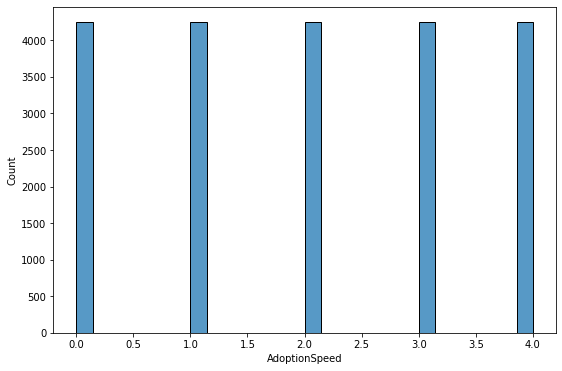

In [198]:
fig = plt.subplots(figsize=(9,6))
sns.histplot(data=y_sampling)
plt.show()

# Preprocessing Data Image

In [201]:
#Ambil data dari drive
drive.mount("/content/drive")
path = "drive/MyDrive/Colab Notebooks/PP/Dataset/dogs vs cats"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
class_names = ['Dogs vs Cats']
dc_path = os.path.join(path, class_names[0], '*')
dc_path = glob.glob(dc_path)

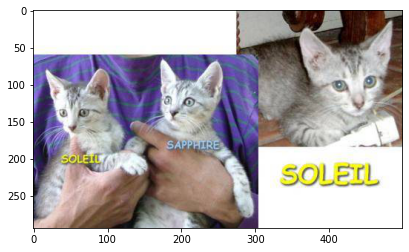

In [208]:
# accessing an image file from the dataset classes
image = io.imread(dc_path[50])
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

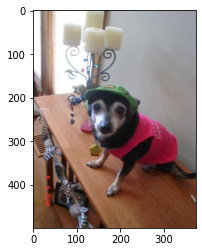

In [209]:
# accessing an image file from the dataset classes
image2 = io.imread(dc_path[2])
# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image2)

###Grayscale Conversion

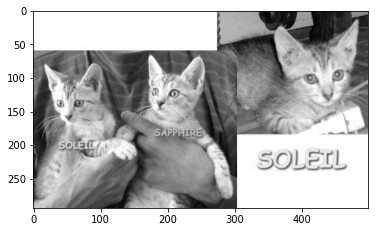

In [212]:
gray_image = skimage.color.rgb2gray(image)
plt.imshow(gray_image, cmap = 'gray')

###Morphological Filtering

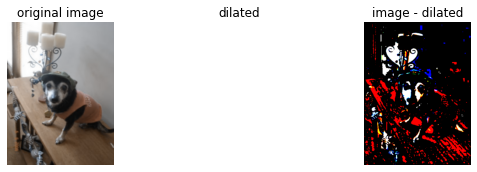

In [213]:
image2 = gaussian_filter(image2, 1)

seed = np.copy(image2)
seed[1:-1, 1:-1] = image2.min()
mask = image2

dilated = reconstruction(seed, mask, method='dilation')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image2, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image2.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image2 - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

##Preprocessing Data Text

In [330]:
tweet_data= pd.read_csv('petfinder-mini.csv')
print(tweet_data)

      Type Age                Breed1  Gender  Color1    Color2 MaturitySize  \
0      Cat   3                 Tabby    Male   Black     White        Small   
1      Cat   1  Domestic Medium Hair    Male   Black     Brown       Medium   
2      Dog   1           Mixed Breed    Male   Brown     White       Medium   
3      Dog   4           Mixed Breed  Female   Black     Brown       Medium   
4      Dog   1           Mixed Breed    Male   Black  No Color       Medium   
...    ...  ..                   ...     ...     ...       ...          ...   
15461  Dog  24                Poodle    Male   Brown    Golden       Medium   
15462  Cat   1   Domestic Short Hair  Female   Cream      Gray       Medium   
15463  Dog   6             Schnauzer  Female   Black     White        Small   
15464  Cat   9   Domestic Short Hair  Female  Yellow     White        Small   
15465  Dog   1           Mixed Breed    Male   Brown  No Color       Medium   

      FurLength Vaccinated Sterilized   Health    F

###Case Folding

In [331]:
tweet_data['Description'] = tweet_data['Description'].str.lower()

print('Case Folding Result : \n')
print(tweet_data['Description'].head(4))
print('\n\n\n')

Case Folding Result : 

0    nibble is a 3+ month old ball of cuteness. he ...
1    i just found it alone yesterday near my apartm...
2    their pregnant mother was dumped by her irresp...
3    good guard dog, very alert, active, obedience ...
Name: Description, dtype: object






###Tokenization Text

In [359]:
# Tokenizing
from nltk.tokenize import RegexpTokenizer
tokenizer     = RegexpTokenizer(r'\w+')
hasil_token   = tokenizer.tokenize(hasil_cf)
print (hasil_token)


['barangnya', 'oke', 'responnya', 'cepat', 'banget', 'mantap']


###Stemming

In [360]:
# Stemming
from nltk.stem import PorterStemmer
stemmer= PorterStemmer()
input_str="Barangnya oke. Responnya cepat Banget, mantap."
input_str=nltk.word_tokenize(input_str)
for word in input_str:
  print(stemmer.stem(word))


barangnya
oke
.
responnya
cepat
banget
,
mantap
.


###Stopword Text

In [301]:
# Filtering
from nltk.corpus import stopwords
wordlist = set(stopwords.words('indonesian'))
print(hasil_token)

['barangnya', 'oke', 'responnya', 'cepat', 'banget', 'mantap']
